Connected successfully!!!

====================================== low ============================================

第一天  日平均收益： -1.0583417070670929
第一天  标准差:  1.2008245738034662
第一天  方差:  1.4419796570502763
第一天  偏度： 0.813297845632733
第一天  超值峰度： 19.062570958921736
第一天  峰度： 22.062570958921736


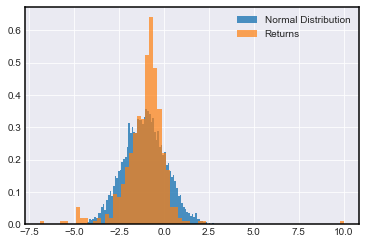

第二天  日平均收益： -0.27999222507026605
第二天  标准差:  2.5677049068152407
第二天  方差:  6.593108488483064
第二天  偏度： 1.353017213931751
第二天  超值峰度： 13.221181068452022
第二天  峰度： 16.221181068452022


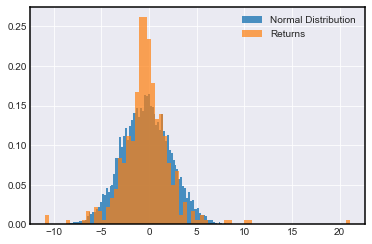

第三天  日平均收益： 0.19923219874284412
第三天  标准差:  3.675221337439101
第三天  方差:  13.507251879167656
第三天  偏度： 2.161680220254497
第三天  超值峰度： 15.885153681143574
第三天  峰度： 18.885153681143574


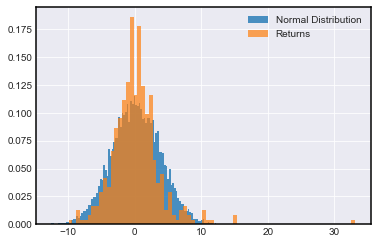

第四天  日平均收益： 0.4508823817039936
第四天  标准差:  4.465984057730874
第四天  方差:  19.94501360390632
第四天  偏度： 1.412886248389146
第四天  超值峰度： 5.166676704777569
第四天  峰度： 8.166676704777569


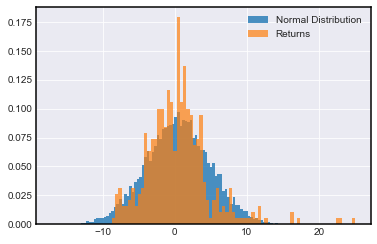

第四天  日平均收益： 0.5754945709806735
第四天  标准差:  4.995449954706666
第四天  方差:  24.954520249978835
第四天  偏度： 1.1292357036771465
第四天  超值峰度： 3.581112327296614
第四天  峰度： 6.581112327296614


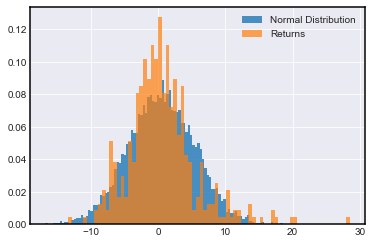

====================================== high ============================================

第一天  日平均收益： 2.2716935634214406
第一天  标准差:  2.3563714340343624
第一天  方差:  5.552486335133158
第一天  偏度： 1.8252755877154414
第一天  超值峰度： 3.7217840731046303
第一天  峰度： 6.72178407310463


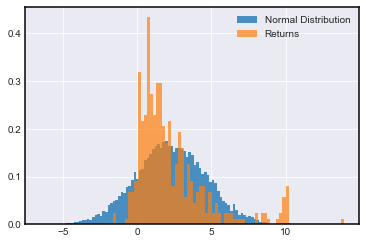

第二天  日平均收益： 2.9453752021433175
第二天  标准差:  3.45614909442969
第二天  方差:  11.944966562927167
第二天  偏度： 1.627652527980717
第二天  超值峰度： 4.542316837572184
第二天  峰度： 7.542316837572184


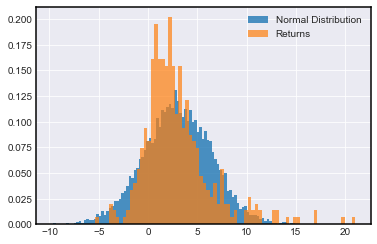

第三天  日平均收益： 3.459608594610326
第三天  标准差:  4.539953579551172
第三天  方差:  20.6111785044795
第三天  偏度： 1.783870530111721
第三天  超值峰度： 6.357819493055636
第三天  峰度： 9.357819493055636


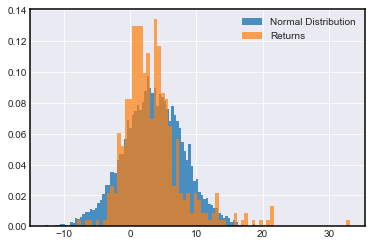

第四天  日平均收益： 3.7203340281669526
第四天  标准差:  5.489061856981428
第四天  方差:  30.129800069768397
第四天  偏度： 1.8705420658086962
第四天  超值峰度： 6.374081902919345
第四天  峰度： 9.374081902919345


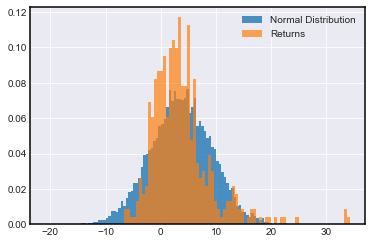

第四天  日平均收益： 4.062748786641578
第四天  标准差:  6.369950814905373
第四天  方差:  40.57627338431362
第四天  偏度： 1.9619452816946146
第四天  超值峰度： 7.3897097752861995
第四天  峰度： 10.3897097752862


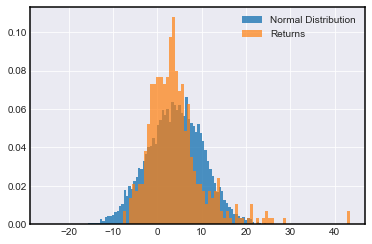

In [3]:
%matplotlib inline
import matplotlib.pyplot as plt
from apps.dailyrun import bhs_rule, data_prepare
import json
import os
import json
import math
import pandas as pd
from pathlib import Path
from pymongo import MongoClient
from datetime import datetime
import time
# from matplotlib.finance import candlestick_ohlc
from mpl_finance import candlestick_ohlc
import matplotlib.dates as mdates
import mplfinance as mpf
import numpy as np

import tushare as ts
from apps.dailyrun import bhs_rule_yt, data_prepare, print_info

from scipy.stats import skew, kurtosis

def days(stock, last_date):  
    realdata = pd.read_csv(Path('data/' + stock + '.CSV').resolve())
    if last_date == "tomorrow" :
        date_selected = realdata['Date'].values
        day3 = date_selected[-2]
        day2 = date_selected[-1]
        day1 = "tomorrow"
    else:
        date_selected = realdata.loc[realdata['Date'] <= last_date]['Date'].values
        day1 = date_selected[-1]
        day2 = date_selected[-2]
        day3 = date_selected[-3]
    
    return day1, day2


def next_5_days(stock, today):  
    realdata = pd.read_csv(Path('data/' + stock + '.CSV').resolve())
    date_selected = realdata.loc[realdata['Date'] >= today]['Date'].values
    day1 = date_selected[1]
    day2 = date_selected[2]
    day3 = date_selected[3]
    day4 = date_selected[4]
    day5 = date_selected[5]
    
    return day1, day2, day3, day4, day5


def plot_distrbute(percentage, day):
    mean_return_daily = np.mean(percentage)
    print(day, " 日平均收益：", mean_return_daily)

    sigma_daily = np.std(percentage)
    print(day, " 标准差: ", sigma_daily)

    variance_daily = sigma_daily ** 2
    print(day, " 方差: ", variance_daily)

    returns_skewness = skew(percentage)
    print(day, " 偏度：", returns_skewness)

    excess_kurtosis = kurtosis(percentage)
    print(day, " 超值峰度：", excess_kurtosis)

    fourth_moment = excess_kurtosis + 3
    print(day, " 峰度：", fourth_moment)

    mu = mean_return_daily
    sigma = sigma_daily
    norm = np.random.normal(mu, sigma, size=10000)
    # 绘制正态分布的概率密度分布图
    plt. hist(norm, bins=100, alpha=0.8, density=True, label='Normal Distribution')

    # 绘制收益的概率密度分布图
    plt.hist(percentage, bins=75, alpha=0.7, density=True, label='Returns')

    # 增加图例说明
    plt.legend()
    # 绘图
    plt.show()

def four_days_change_close(stock, date):
    day1, day2, day3, day4, day5 = next_5_days(stock, date)
    realdata = pd.read_csv(Path('data/' + stock + '.CSV').resolve())
    current_close = realdata.loc[realdata['Date'] == date]['Close'].values[0]

    close_day1 = realdata.loc[realdata['Date'] == day1]['Close'].values[0]
    close_day2 = realdata.loc[realdata['Date'] == day2]['Close'].values[0]
    close_day3 = realdata.loc[realdata['Date'] == day3]['Close'].values[0]
    close_day4 = realdata.loc[realdata['Date'] == day4]['Close'].values[0]
    close_day5 = realdata.loc[realdata['Date'] == day5]['Close'].values[0] 

    day1_change_percentage = (close_day1 - current_close)*100/current_close
    day2_change_percentage = (close_day2 - current_close)*100/current_close
    day3_change_percentage = (close_day3 - current_close)*100/current_close
    day4_change_percentage = (close_day4 - current_close)*100/current_close
    day5_change_percentage = (close_day5 - current_close)*100/current_close  
    
    return day1_change_percentage, day2_change_percentage, day3_change_percentage, day4_change_percentage


def four_days_change_low(stock, date):
    day1, day2, day3, day4, day5 = next_5_days(stock, date)
    realdata = pd.read_csv(Path('data/' + stock + '.CSV').resolve())
    current_close = realdata.loc[realdata['Date'] == date]['Close'].values[0]

    low_day1 = realdata.loc[realdata['Date'] == day1]['Low'].values[0]
    low_day2 = realdata.loc[realdata['Date'] == day2]['Low'].values[0]
    low_day3 = realdata.loc[realdata['Date'] == day3]['Low'].values[0]
    low_day4 = realdata.loc[realdata['Date'] == day4]['Low'].values[0]
    low_day5 = realdata.loc[realdata['Date'] == day5]['Low'].values[0] 

    day1_change_percentage = (low_day1 - current_close)*100/current_close
    day2_change_percentage = (low_day2 - current_close)*100/current_close
    day3_change_percentage = (low_day3 - current_close)*100/current_close
    day4_change_percentage = (low_day4 - current_close)*100/current_close
    day5_change_percentage = (low_day5 - current_close)*100/current_close  
    
    return day1_change_percentage, day2_change_percentage, day3_change_percentage, day4_change_percentage, day5_change_percentage

def four_days_change_high(stock, date):
    day1, day2, day3, day4, day5 = next_5_days(stock, date)
    realdata = pd.read_csv(Path('data/' + stock + '.CSV').resolve())
    current_close = realdata.loc[realdata['Date'] == date]['Close'].values[0]

    high_day1 = realdata.loc[realdata['Date'] == day1]['High'].values[0]
    high_day2 = realdata.loc[realdata['Date'] == day2]['High'].values[0]
    high_day3 = realdata.loc[realdata['Date'] == day3]['High'].values[0]
    high_day4 = realdata.loc[realdata['Date'] == day4]['High'].values[0]
    high_day5 = realdata.loc[realdata['Date'] == day5]['High'].values[0] 

    day1_change_percentage = (high_day1 - current_close)*100/current_close
    day2_change_percentage = (high_day2 - current_close)*100/current_close
    day3_change_percentage = (high_day3 - current_close)*100/current_close
    day4_change_percentage = (high_day4 - current_close)*100/current_close
    day5_change_percentage = (high_day5 - current_close)*100/current_close  
    
    return day1_change_percentage, day2_change_percentage, day3_change_percentage, day4_change_percentage, day5_change_percentage



try: 
    conn = MongoClient() 
    print("Connected successfully!!!") 
    print()
except:   
    print("Could not connect to MongoDB") 

db = conn.stock_result
stock_list = db.list_collection_names()

# realdata = pd.read_csv(Path('data/' + "002751" + '.CSV').resolve())
# date_selected = realdata.loc[(realdata['Date'] >= "2019-12-04") & (realdata['Date'] <= "2019-12-19")]['Date'].values

day1_percentage_low = []
day2_percentage_low = []
day3_percentage_low = []
day4_percentage_low = []
day5_percentage_low = []

day1_percentage_high = []
day2_percentage_high = []
day3_percentage_high = []
day4_percentage_high = []
day5_percentage_high = []

day3_strong = []
day4_strong = []




for stock in stock_list :
#     db.collection.find({"vitamins":"A1"})
    results = db[str(stock)].find({"result":["低位趋势开始反转，开始走强，考虑进入 +5"]})
#     print(results)
    for doc in results:
        if ["做空存在，不要参与 -8"] not in doc['result']:
            if ["价格高于短期均线，权重调整 +1"] in doc['result'] or ["价格高于中期均线，权重调整 +3"] in doc['result'] : 
                
#                 day1, day2, day3, day4, day5 = next_5_days(doc["code"], doc['date'])
#                 realdata = pd.read_csv(Path('data/' + doc["code"] + '.CSV').resolve())
#                 current_close = realdata.loc[realdata['Date'] == doc['date']]['Close'].values[0]
                
#                 close_day1 = realdata.loc[realdata['Date'] == day1]['Close'].values[0]
#                 close_day2 = realdata.loc[realdata['Date'] == day2]['Close'].values[0]
#                 close_day3 = realdata.loc[realdata['Date'] == day3]['Close'].values[0]
#                 close_day4 = realdata.loc[realdata['Date'] == day4]['Close'].values[0]
#                 close_day5 = realdata.loc[realdata['Date'] == day5]['Close'].values[0] 
                
#                 day1_change_percentage = (close_day1 - current_close)*100/current_close
#                 day2_change_percentage = (close_day2 - current_close)*100/current_close
#                 day3_change_percentage = (close_day3 - current_close)*100/current_close
#                 day4_change_percentage = (close_day4 - current_close)*100/current_close
#                 day5_change_percentage = (close_day5 - current_close)*100/current_close    
                day1_change_percentage_low, day2_change_percentage_low, day3_change_percentage_low, day4_change_percentage_low, day5_change_percentage_low = four_days_change_low(doc["code"], doc['date'])
                day1_percentage_low.append(day1_change_percentage_low)
                day2_percentage_low.append(day2_change_percentage_low)
                day3_percentage_low.append(day3_change_percentage_low)
                day4_percentage_low.append(day4_change_percentage_low)
                day5_percentage_low.append(day5_change_percentage_low)                

                
                day1_change_percentage_high, day2_change_percentage_high, day3_change_percentage_high, day4_change_percentage_high, day5_change_percentage_high = four_days_change_high(doc["code"], doc['date'])
                day1_percentage_high.append(day1_change_percentage_high)
                day2_percentage_high.append(day2_change_percentage_high)
                day3_percentage_high.append(day3_change_percentage_high)
                day4_percentage_high.append(day4_change_percentage_high)
                day5_percentage_high.append(day5_change_percentage_high)
                
#                 if day3_change_percentage > 6:
#                     day3_strong.append([stock, doc['date']])
#                 if day4_change_percentage > 10:
#                     day4_strong.append([stock, doc['date']])                          

conn.close()
print("====================================== low ============================================")
print()
plot_distrbute(day1_percentage_low, "第一天")

plot_distrbute(day2_percentage_low, "第二天")

plot_distrbute(day3_percentage_low, "第三天")

plot_distrbute(day4_percentage_low, "第四天")

plot_distrbute(day5_percentage_low, "第五天")

print("====================================== high ============================================")
print()
plot_distrbute(day1_percentage_high, "第一天")

plot_distrbute(day2_percentage_high, "第二天")

plot_distrbute(day3_percentage_high, "第三天")

plot_distrbute(day4_percentage_high, "第四天")

plot_distrbute(day5_percentage_high, "第五天")

# print("day3 strong")
# print(day3_strong)
# print("day4 strong")
# print(day4_strong)

# plt.hist(day1_percentage, bins=75)
# plt.show()
# plt.hist(day2_percentage, bins=75)
# plt.show()
# plt.hist(day3_percentage, bins=75)
# plt.show()
# plt.hist(day4_percentage, bins=75)
# plt.show()
# plt.hist(day5_percentage, bins=75)
# plt.show()
                    
                    




In [6]:



day3_strong = [['002156', '2019-12-04'], ['002481', '2019-12-05'], ['000823', '2019-12-09'], ['002156', '2019-12-09'], ['601877', '2019-12-09'], ['603718', '2019-12-09'], ['000823', '2019-12-11'], ['002079', '2019-12-11'], ['002846', '2019-12-13'], ['601231', '2019-12-13'], ['601878', '2019-12-13'], ['000818', '2019-12-13'], ['601698', '2019-12-13'], ['002261', '2019-12-13'], ['600732', '2019-12-16'], ['603598', '2019-12-16'], ['603998', '2019-12-16'], ['002174', '2019-12-16'], ['603035', '2019-12-16'], ['603239', '2019-12-17'], ['002602', '2019-12-17'], ['600768', '2019-12-17']]
day4_strong = [['002449', '2019-12-04'], ['002156', '2019-12-04'], ['603982', '2019-12-04'], ['002185', '2019-12-04'], ['002212', '2019-12-06'], ['000823', '2019-12-09'], ['002156', '2019-12-09'], ['601877', '2019-12-09'], ['603718', '2019-12-09'], ['000823', '2019-12-11'], ['600668', '2019-12-11'], ['002079', '2019-12-11'], ['600081', '2019-12-11'], ['600155', '2019-12-11'], ['600446', '2019-12-11'], ['002846', '2019-12-13'], ['002541', '2019-12-13'], ['000002', '2019-12-13'], ['601231', '2019-12-13'], ['603859', '2019-12-13'], ['601878', '2019-12-13'], ['000818', '2019-12-13'], ['600768', '2019-12-13'], ['002738', '2019-12-13'], ['002261', '2019-12-13'], ['603598', '2019-12-16'], ['002174', '2019-12-16'], ['603035', '2019-12-16'], ['002602', '2019-12-17'], ['600768', '2019-12-17']]


print(len(day4_strong))
# for stock in day3_strong :
#     stock


30


In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
from apps.dailyrun import bhs_rule, data_prepare
import json
import os
import json
import math
import pandas as pd
from pathlib import Path
from pymongo import MongoClient
from datetime import datetime
import time
# from matplotlib.finance import candlestick_ohlc
from mpl_finance import candlestick_ohlc
import matplotlib.dates as mdates
import mplfinance as mpf

import tushare as ts
from apps.dailyrun import bhs_rule_yt, data_prepare, print_info



def days(stock, last_date):  
    realdata = pd.read_csv(Path('data/' + stock + '.CSV').resolve())
    if last_date == "tomorrow" :
        date_selected = realdata['Date'].values
        day3 = date_selected[-2]
        day2 = date_selected[-1]
        day1 = "tomorrow"
    else:
        date_selected = realdata.loc[realdata['Date'] <= last_date]['Date'].values
        day1 = date_selected[-1]
        day2 = date_selected[-2]
        day3 = date_selected[-3]
    
    return day1, day2


def next_5_days(stock, today):  
    realdata = pd.read_csv(Path('data/' + stock + '.CSV').resolve())
    date_selected = realdata.loc[realdata['Date'] >= today]['Date'].values
    day1 = date_selected[1]
    day2 = date_selected[2]
    day3 = date_selected[3]
    day4 = date_selected[4]
    day5 = date_selected[5]
    
    return day1, day2, day3, day4, day5

try: 
    conn = MongoClient() 
    print("Connected successfully!!!") 
    print()
except:   
    print("Could not connect to MongoDB") 

db = conn.stock
stock_list = db.list_collection_names()

# all_stocks = pd.read_csv("all_stocks.csv") 
# strong_list = []
# todo_list = []

# print(next_5_days('002751', "2019-12-05"))
realdata = pd.read_csv(Path('data/' + "002751" + '.CSV').resolve())
date_selected = realdata.loc[(realdata['Date'] >= "2019-12-03") & (realdata['Date'] <= "2019-12-19")]['Date'].values
print(date_selected)

day1_percentage = []
day2_percentage = []
day3_percentage = []
day4_percentage = []
day5_percentage = []

day3_strong = []
day4_strong = []

for date in date_selected:
    for stock in stock_list :
        try:
            today, yesterday = days(stock, date)
            today_data = data_prepare(stock, "no", today)
            yesterday_data = data_prepare(stock, "no", yesterday)
            position_today, today_info = bhs_rule_yt(yesterday_data, today_data)

            result = {
                "code":stock,
                "date":date,
                "result":today_info,
                "position":position_today
            }
            result['_id'] = stock + "_" + date
            db = conn.stock_result
            if stock in db.list_collection_names() :
                # print(stock)
                try:
                    db[str(stock)].insert_one(result)
                except:
                    h=1
#                     print("这一天数据已经有了需要更新")
#                     query = { "_id": predictions['_id'] }
#                     newvalues = {"$set":{
#                             "code":stock,
#                             "date":date,
#                             "high":p_5_h,
#                             "low":p_5_l
#                     }}
#                     db[str(stock)].update_one(query, newvalues)
            else:
                try:
                    db.create_collection(stock)
                    db[str(stock)].insert_one(result)
                except:
                    print(stock, " ",  date, " 建立集合错误")
        except:
            print("数据信息错误，high low 没有结果", stock, today, yesterday)
    print("结束工作，日期：", date )
            
            
            
            
            

Connected successfully!!!

['2019-12-04' '2019-12-05' '2019-12-06' '2019-12-09' '2019-12-10'
 '2019-12-11' '2019-12-12' '2019-12-13' '2019-12-16' '2019-12-17'
 '2019-12-18' '2019-12-19']
这一天数据已经有了需要更新
数据信息错误，high low 没有结果 002751 2019-12-04 2019-12-03
这一天数据已经有了需要更新
数据信息错误，high low 没有结果 603059 2019-12-04 2019-12-03
这一天数据已经有了需要更新
数据信息错误，high low 没有结果 603538 2019-12-04 2019-12-03
这一天数据已经有了需要更新
数据信息错误，high low 没有结果 603567 2019-12-04 2019-12-03
这一天数据已经有了需要更新
数据信息错误，high low 没有结果 002881 2019-12-04 2019-12-03
这一天数据已经有了需要更新
数据信息错误，high low 没有结果 001914 2019-12-04 2019-12-03
这一天数据已经有了需要更新
数据信息错误，high low 没有结果 603337 2019-12-04 2019-12-03
这一天数据已经有了需要更新
数据信息错误，high low 没有结果 002414 2019-12-04 2019-12-03
这一天数据已经有了需要更新
数据信息错误，high low 没有结果 600548 2019-12-04 2019-12-03
这一天数据已经有了需要更新
数据信息错误，high low 没有结果 600998 2019-12-04 2019-12-03
这一天数据已经有了需要更新
数据信息错误，high low 没有结果 603239 2019-12-04 2019-12-03
这一天数据已经有了需要更新
数据信息错误，high low 没有结果 603612 2019-12-04 2019-12-03
这一天数据已经有了需要更新
数据信息错误，high low 没有结果 002182 201

601231   环旭电子   2019-12-02  not ready, please do optimizer
数据信息错误，high low 没有结果 601231 2019-12-03 2019-12-02
002254   泰和新材   2019-11-22  not ready, please do optimizer
数据信息错误，high low 没有结果 002254 2019-11-22 2019-11-21
结束工作，日期： 2019-12-06
数据信息错误，high low 没有结果 601512 2019-12-09 2019-12-06
601231   环旭电子   2019-12-02  not ready, please do optimizer
数据信息错误，high low 没有结果 601231 2019-12-03 2019-12-02
002254   泰和新材   2019-12-09  not ready, please do optimizer
数据信息错误，high low 没有结果 002254 2019-12-09 2019-11-22
结束工作，日期： 2019-12-09
数据信息错误，high low 没有结果 601512 2019-12-10 2019-12-09
601231   环旭电子   2019-12-02  not ready, please do optimizer
数据信息错误，high low 没有结果 601231 2019-12-03 2019-12-02
002254   泰和新材   2019-12-09  not ready, please do optimizer
数据信息错误，high low 没有结果 002254 2019-12-10 2019-12-09
结束工作，日期： 2019-12-10
数据信息错误，high low 没有结果 601512 2019-12-11 2019-12-10
601231   环旭电子   2019-12-02  not ready, please do optimizer
数据信息错误，high low 没有结果 601231 2019-12-03 2019-12-02
结束工作，日期： 2019-12-11
数据信息错误，

63


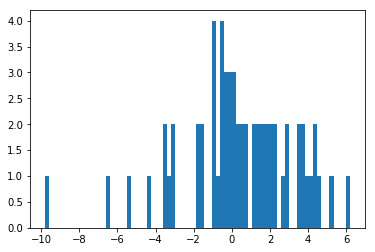

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
from apps.dailyrun import bhs_rule, data_prepare
import json
import os
import json
import math
import pandas as pd
from pathlib import Path
from pymongo import MongoClient
from datetime import datetime
import time
# from matplotlib.finance import candlestick_ohlc
# from mpl_finance import candlestick_ohlc
# import matplotlib.dates as mdates
# import mplfinance as mpf

from apps.dailyrun import bhs_rule_yt, data_prepare, print_info

strong_list = ['002751', '603045', '002602', '002853', '603985', '002236', '002607', '002626', '000681', '000411', '000823', '600587', '002898', '600271', '600088', '603037', '603859', '002129', '002399', '002906', '600847', '002741', '002928', '600081', '603456', '600150', '600746', '603339', '603363', '603916', '603585', '002301', '002757', '603131', '600053', '600114', '600636', '000885', '603393', '002943', '603179', '603260', '002430', '600893', '603789', '600200', '603588', '600426', '603386', '600768', '600764', '603486', '603313', '603035', '000819', '603189', '000930', '601137', '000877', '002951', '601360', '603356', '603600']
yesterday = "2019-12-04"
strong_date = "2019-12-05"
day1 = "2019-12-06"
day2 = "2019-12-09"
day3 = "2019-12-10"
day4 = "2019-12-11"
print(len(strong_list))
day1_to_plot = []
day2_to_plot = []
day3_to_plot = []
day4_to_plot = []
for stock in strong_list :
    realdata = pd.read_csv(Path('data/' + stock + '.CSV').resolve())
    yesterday_close = realdata.loc[realdata['Date'] == yesterday]['Close'].values[0]
    current_close = realdata.loc[realdata['Date'] == strong_date]['Close'].values[0]
    close_day1 = realdata.loc[realdata['Date'] == day1]['Close'].values[0]
    close_day2 = realdata.loc[realdata['Date'] == day2]['Close'].values[0]
    close_day3 = realdata.loc[realdata['Date'] == day3]['Close'].values[0]
    close_day4 = realdata.loc[realdata['Date'] == day4]['Close'].values[0]
    current_change_percentage = (current_close - yesterday_close)*100/yesterday_close
    day1_change_percentage = (close_day1 - current_close)*100/current_close
    day2_change_percentage = (close_day2 - current_close)*100/current_close
    day3_change_percentage = (close_day3 - current_close)*100/current_close
    day4_change_percentage = (close_day4 - current_close)*100/current_close
    day1_to_plot.append(day1_change_percentage)
    day2_to_plot.append(day2_change_percentage)
    day3_to_plot.append(day3_change_percentage)
    day4_to_plot.append(day4_change_percentage)
    
#     print(current_close, " ",close_day1, " ", current_change_percentage, " ", day1_change_percentage, " ", day2_change_percentage, " ", day3_change_percentage, " ", day4_change_percentage)

# plt.hist(day1_to_plot, bins=75)
# plt.hist(day2_to_plot, bins=75)
# plt.hist(day3_to_plot, bins=75)
plt.hist(day4_to_plot, bins=75)
plt.show()


In [4]:
%matplotlib inline
import matplotlib.pyplot as plt
from apps.dailyrun import bhs_rule, data_prepare
import json
import os
import json
import math
import pandas as pd
from pathlib import Path
from pymongo import MongoClient
from datetime import datetime
import time
# from matplotlib.finance import candlestick_ohlc
from mpl_finance import candlestick_ohlc
import matplotlib.dates as mdates
import mplfinance as mpf

import tushare as ts
from apps.dailyrun import bhs_rule_yt, data_prepare, print_info



def days(stock, last_date):  
    realdata = pd.read_csv(Path('data/' + stock + '.CSV').resolve())
    if last_date == "tomorrow" :
        date_selected = realdata['Date'].values
        day3 = date_selected[-2]
        day2 = date_selected[-1]
        day1 = "tomorrow"
    else:
        date_selected = realdata.loc[realdata['Date'] <= last_date]['Date'].values
        day1 = date_selected[-1]
        day2 = date_selected[-2]
        day3 = date_selected[-3]
    
    return day1, day2, day3


def next_5_days(stock, today):  
    realdata = pd.read_csv(Path('data/' + stock + '.CSV').resolve())
    date_selected = realdata.loc[realdata['Date'] >= today]['Date'].values
    day1 = date_selected[1]
    day2 = date_selected[2]
    day3 = date_selected[3]
    day4 = date_selected[4]
    day5 = date_selected[5]
    
    return day1, day2, day3, day4, day5

try: 
    conn = MongoClient() 
    print("Connected successfully!!!") 
    print()
except:   
    print("Could not connect to MongoDB") 

db = conn.stock
stock_list = db.list_collection_names()

stock_none_list = []
for stock_code in stock_list:
    data = db[str(stock_code)].find_one({"date" : "2019-12-11"})
    if data == None:
        stock_none_list.append(stock_code)
print(stock_none_list)

Connected successfully!!!

['601512', '601231', '603551', '002095', '002428', '600093', '603558', '000876', '601236', '600976', '002741', '688033', '603138', '002079', '603638', '600729', '002928', '600754', '002331', '600753', '600081', '600155', '603721', '002601', '002246', '002391', '603456', '601990', '600406', '000803', '002241', '002866', '002436', '603970', '688108', '600597', '002949', '600802', '600645', '002038', '002822', '002020', '002035', '002734', '600741', '603390', '000032', '002174', '600083', '002424', '600131', '600637', '603700', '603330', '688003', '002621', '002941', '603133', '603339', '002972', '000550', '600196', '002233', '002223', '603363', '603329', '600340', '002463', '002080', '002484', '002829', '603536', '002890', '603916', '603585', '600171', '600667', '600070', '002214', '002595', '603226', '002301', '600883', '002655', '600389', '603738', '002268', '002826', '600771', '603355', '603888', '002189', '603626', '002757', '603825', '600783', '002518', '0